In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("new_final_df.csv")
cols = [0]
df.drop(df.columns[cols],axis=1,inplace=True)
df

,home,net_points,net_yard,net_turn,weekly_rank,spread,Win,WinSpread
0,1,0,0,0,2,-5.5,1.0,1.0
1,0,0,0,0,6,5.5,0.0,0.0
2,1,0,0,0,17,-1.0,0.0,0.0
3,0,0,0,0,15,1.0,1.0,1.0
4,1,0,0,0,27,-3.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4603,0,116,1268,-4,10,6.0,1.0,1.0
4604,1,112,-104,-15,7,-6.5,1.0,0.0
4605,0,-34,-325,0,13,6.5,0.0,1.0
4606,1,52,-302,-5,8,-3.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
X = df.drop(columns=['Win', 'WinSpread'],axis=1)
#y = df['Win']
y = df['WinSpread']
y = y.astype('int')

#Split to test and train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print ("Training set accuracy:", '%.3f'%(score))
print ("Test set accuracy:", '%.3f'%(score2))

Training set accuracy: 0.511
Test set accuracy: 0.502


In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()
deep_model.add(Dense(units=10, activation='relu', input_dim=6))
deep_model.add(Dense(units=8, activation='relu'))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=4, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [11]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [12]:
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 3225 samples
Epoch 1/100
3225/3225 - 1s - loss: 0.6945 - accuracy: 0.5045
Epoch 2/100
3225/3225 - 0s - loss: 0.6933 - accuracy: 0.5060
Epoch 3/100
3225/3225 - 0s - loss: 0.6928 - accuracy: 0.5091
Epoch 4/100
3225/3225 - 0s - loss: 0.6927 - accuracy: 0.5129
Epoch 5/100
3225/3225 - 0s - loss: 0.6925 - accuracy: 0.5126
Epoch 6/100
3225/3225 - 0s - loss: 0.6924 - accuracy: 0.5119
Epoch 7/100
3225/3225 - 0s - loss: 0.6922 - accuracy: 0.5194
Epoch 8/100
3225/3225 - 0s - loss: 0.6919 - accuracy: 0.5209
Epoch 9/100
3225/3225 - 0s - loss: 0.6916 - accuracy: 0.5240
Epoch 10/100
3225/3225 - 0s - loss: 0.6911 - accuracy: 0.5253
Epoch 11/100
3225/3225 - 0s - loss: 0.6909 - accuracy: 0.5262
Epoch 12/100
3225/3225 - 0s - loss: 0.6904 - accuracy: 0.5340
Epoch 13/100
3225/3225 - 0s - loss: 0.6903 - accuracy: 0.5349
Epoch 14/100
3225/3225 - 0s - loss: 0.6897 - accuracy: 0.5355
Epoch 15/100
3225/3225 - 0s - loss: 0.6893 - accuracy: 0.5367
Epoch 16/100
3225/3225 - 0s - loss: 0.6884 - accuracy: 0.

In [13]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1383/1 - 0s - loss: 0.7228 - accuracy: 0.4939
Deep Neural Network - Loss: 0.7290488860353731, Accuracy: 0.49385392665863037


In [14]:
df.loc[df.Win == 0.5,'Win'] = 0
df.loc[df.WinSpread == 0.5,'WinSpread'] = 0

In [15]:
target = df["WinSpread"]
target_names = ["loss", "win"]

In [16]:
data = df.drop(columns=['Win', 'WinSpread'],axis=1)
feature_names = data.columns
data.head(50)

,home,net_points,net_yard,net_turn,weekly_rank,spread
0,1,0,0,0,2,-5.5
1,0,0,0,0,6,5.5
2,1,0,0,0,17,-1.0
3,0,0,0,0,15,1.0
4,1,0,0,0,27,-3.0
5,0,0,0,0,31,3.0
6,1,0,0,0,19,-3.0
7,0,0,0,0,20,3.0
8,1,0,0,0,21,3.0
9,0,0,0,0,9,-3.0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5130208333333334

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5321180555555556

In [20]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.24160343371794304, 'net_yard'),
 (0.2177545893336141, 'net_points'),
 (0.19968106964978927, 'spread'),
 (0.16194767657081097, 'weekly_rank'),
 (0.14728926018340438, 'net_turn'),
 (0.031723970544438256, 'home')]

In [21]:
history = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
     #validation_split=0.1,
    epochs=100,
    shuffle=True,
    verbose=2
)

print(history.history.keys())



Train on 3225 samples
Epoch 1/100
3225/3225 - 0s - loss: 0.6636 - accuracy: 0.5926
Epoch 2/100
3225/3225 - 0s - loss: 0.6645 - accuracy: 0.5885
Epoch 3/100
3225/3225 - 0s - loss: 0.6642 - accuracy: 0.5919
Epoch 4/100
3225/3225 - 0s - loss: 0.6639 - accuracy: 0.5879
Epoch 5/100
3225/3225 - 0s - loss: 0.6626 - accuracy: 0.5947
Epoch 6/100
3225/3225 - 0s - loss: 0.6635 - accuracy: 0.5938
Epoch 7/100
3225/3225 - 0s - loss: 0.6626 - accuracy: 0.5938
Epoch 8/100
3225/3225 - 0s - loss: 0.6631 - accuracy: 0.5929
Epoch 9/100
3225/3225 - 0s - loss: 0.6626 - accuracy: 0.5932
Epoch 10/100
3225/3225 - 0s - loss: 0.6620 - accuracy: 0.5981
Epoch 11/100
3225/3225 - 0s - loss: 0.6624 - accuracy: 0.5966
Epoch 12/100
3225/3225 - 0s - loss: 0.6624 - accuracy: 0.5969
Epoch 13/100
3225/3225 - 0s - loss: 0.6625 - accuracy: 0.5929
Epoch 14/100
3225/3225 - 0s - loss: 0.6616 - accuracy: 0.6000
Epoch 15/100
3225/3225 - 0s - loss: 0.6627 - accuracy: 0.5941
Epoch 16/100
3225/3225 - 0s - loss: 0.6625 - accuracy: 0.

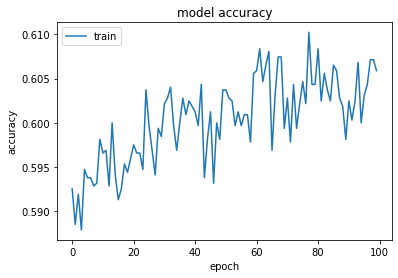

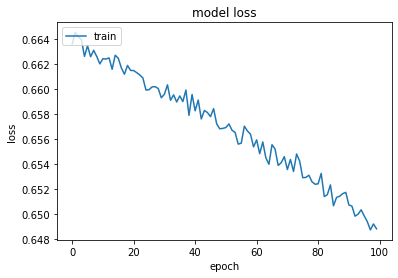

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# sns.set_style("whitegrid");
# sns.pairplot(df, hue="Win", height=3);
# plt.show()
#fuckthisshit